In [1]:
import os
os.chdir("..")

In [2]:
import multi_agent_reinforcement_learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
no_cars_list = [100, 200, 300, 400, 187, 374]
no_cars_data = {no: {"rew": [], "p": []} for no in no_cars_list}
for no_cars in no_cars_list:
    df = pd.read_csv(f"data/data_{no_cars}.csv")
    first_run = df[df.columns[1::3]].iloc[:, :2]
    second_run = df[df.columns[1::3]].iloc[:, 2:]
    runs = [first_run, second_run]
    for run in runs:
        run.columns = ["rew", "p"]
        p = run[run["rew"] == run["rew"].max()].p.iloc[0]
        rew = run[run["rew"] == run["rew"].max()].rew.iloc[0]
        no_cars_data[no_cars]["p"].append(p)
        no_cars_data[no_cars]["rew"].append(rew)
        print(f"{no_cars}: {p, rew}")

100: (3.917144179344177, 12126.192140245434)
100: (4.014117205142975, 11408.500498199464)
200: (3.134539759159088, 16714.98612103462)
200: (3.2976149559020995, 15944.327905797958)
300: (2.9810355424880983, 18778.89719071388)
300: (2.4839508533477783, 19787.03102426529)
400: (2.164812111854553, 19959.608273220063)
400: (2.811212480068207, 21590.821540498742)
187: (2.9840901374816893, 17110.244294118882)
187: (3.744179630279541, 16141.152623605729)
374: (2.3944360971450807, 20958.22516684532)
374: (2.479808390140533, 22367.14846158028)


In [4]:
df = pd.DataFrame(no_cars_data)
df = df.T.explode(list(df.T.columns)).reset_index()
df.columns = ["no_cars", "reward", "price"]

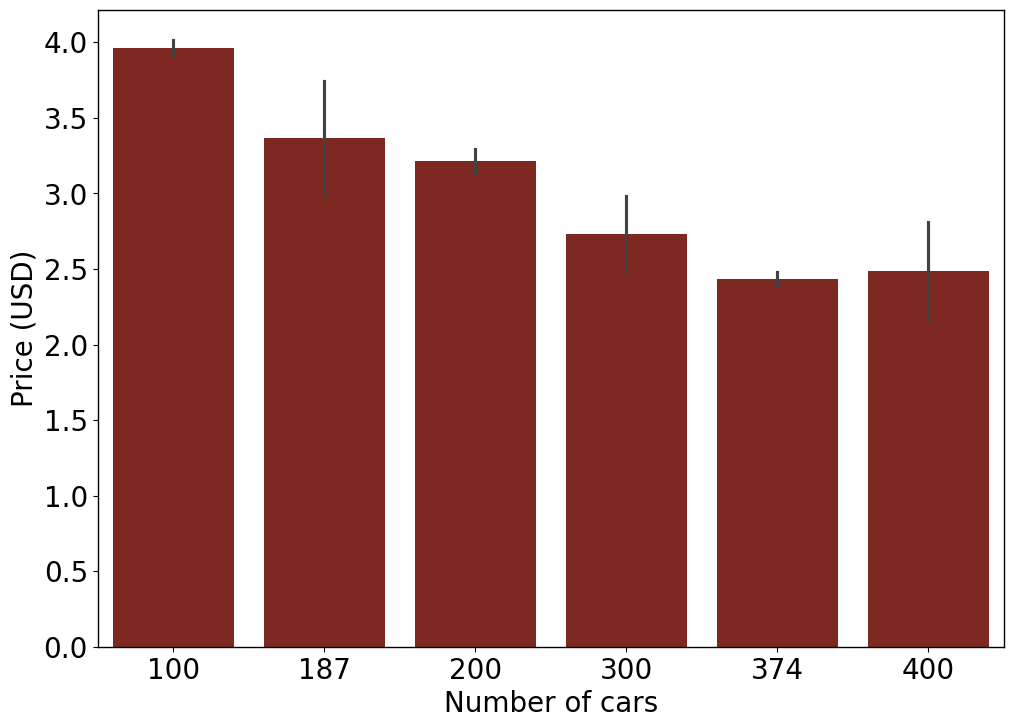

In [5]:
plt.figure(figsize=(11.69,8.27))
sns.barplot(x="no_cars", y="price", data=df)
plt.xlabel("Number of cars")
plt.ylabel("Price (USD)")
plt.savefig("figs/no_cars_vs_price.png")
plt.show()

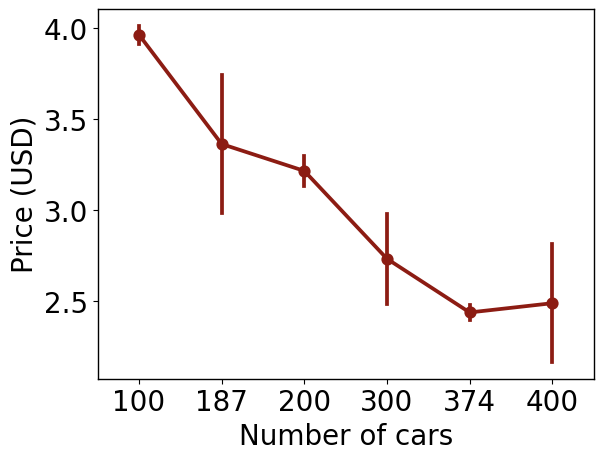

In [6]:
sns.pointplot(x="no_cars", y="price", data=df)
plt.xlabel("Number of cars")
plt.ylabel("Price (USD)")
plt.show()

In [7]:
df.groupby("no_cars").std()

,reward,price
no_cars,,
100,507.484627,0.068570
187,685.251292,0.537464
200,544.937650,0.115312
300,712.858270,0.351492
374,996.259216,0.060367
400,1153.441963,0.457074


In [8]:
df.groupby("no_cars").mean()

,reward,price
no_cars,,
100,11767.346319,3.965631
187,16625.698459,3.364135
200,16329.657013,3.216077
300,19282.964107,2.732493
374,21662.686814,2.437122
400,20775.214907,2.488012


In [9]:
import wandb

def get_run_data(run_id: str) -> (pd.DataFrame, str):
    api = wandb.Api()
    run = api.run(f"kind_green_thesis/master2023/{run_id}")
    entries = []
    
    for obs in run.scan_history():
        entries.append(obs)
    
    return pd.DataFrame(entries), run.name

In [10]:
ids = [
    "fh2g630f", 
    "lx82xtyw",
    "q5p4mku4",
    "rurh00zm",
    "90gb428s",
    "jfxuosux",
    "dzw1z67s",
    "7aytkkz0",
    "glgs86dw",
    "zuemugih",
    "x3x0wie7",
    "dflcapwl",
]

In [13]:
# unmet_data = {}
# for id_ in ids:
#     df, name = get_run_data(id_)
#     unmet = df[df["Best Reward"] == df["Best Reward"].max()].iloc[0]["RL_1_SAC_served_demand"]
#     unmet_data[name] = unmet 
# unmet_data

In [14]:
cars = [400, 400, 374, 374, 300, 300, 200, 200, 187, 187, 100, 100]
unmet_demand = [995, 821, 943, 966, 665, 850, 554, 528, 573, 465, 312, 297]

In [15]:
df_dem = pd.DataFrame(unmet_demand, index=cars, columns=["served_demand"]).reset_index()
df_dem.columns = ["no_cars", "served_demand"]

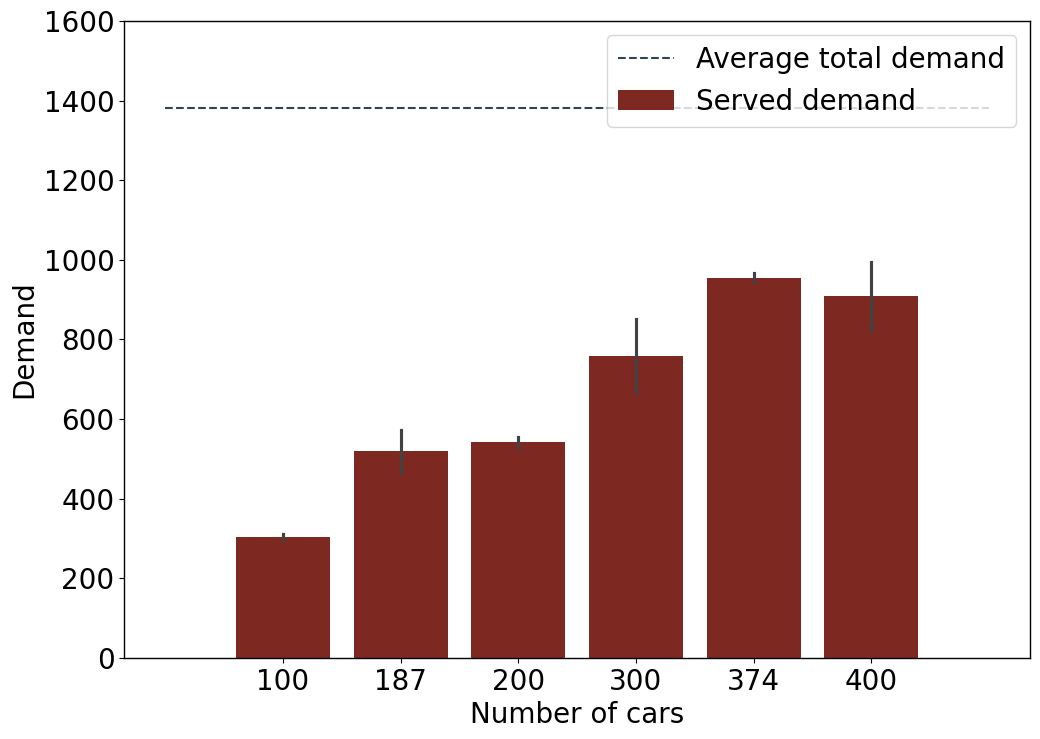

In [16]:
plt.figure(figsize=(11.69,8.27))
sns.barplot(x="no_cars", y="served_demand", data=df_dem, label="Served demand")
plt.ylim(0, 1600)
plt.hlines(1380, -1, 6, linestyle="dashed", label="Average total demand", color="#2F4550")
plt.ylabel("Demand")
plt.xlabel("Number of cars")
plt.legend()
plt.savefig("figs/no_cars_vs_demand.png")
plt.show()

In [17]:
df_dem["served_per_car"] = df_dem["served_demand"] / df_dem["no_cars"]

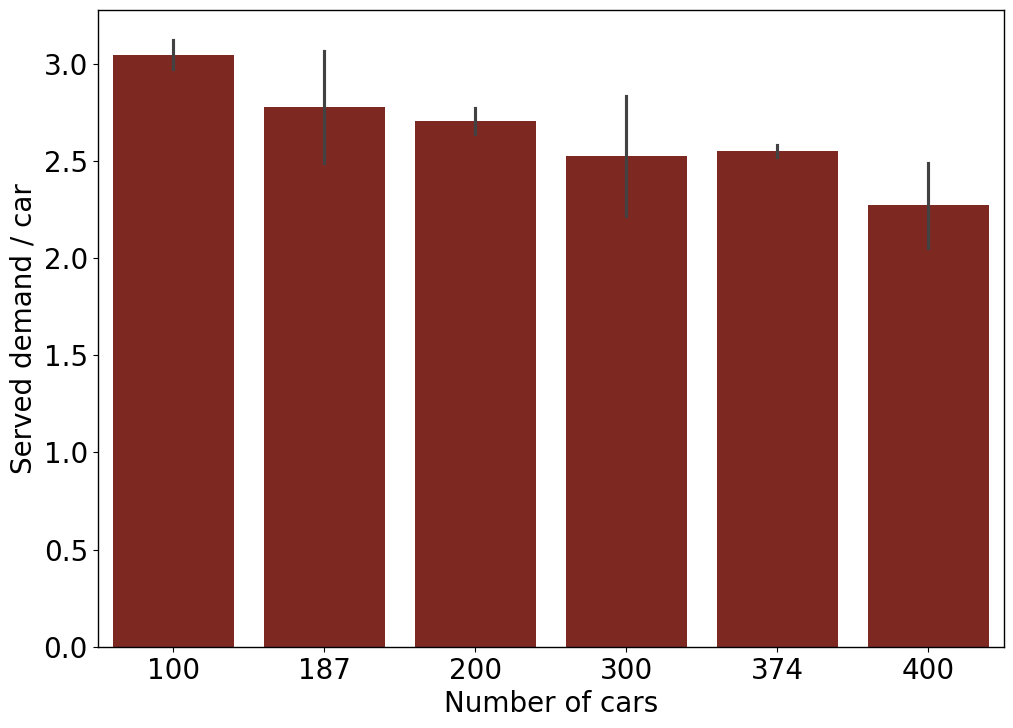

In [18]:
plt.figure(figsize=(11.69,8.27))
sns.barplot(x="no_cars", y="served_per_car", data=df_dem)
plt.ylabel("Served demand / car")
plt.xlabel("Number of cars")
plt.show()

In [29]:
from urllib.request import urlopen
import pickle

In [30]:
raw = urlopen("

In [31]:
pickle.load(raw)

UnpicklingError: invalid load key, '\x0a'.

In [43]:
import pickle
import requests

In [44]:
r=requests.get('https://github.com/carolinssc/offline-rl-for-amod/blob/master/replaymemories/Replaymemory_san_francisco_M.pkl',stream='True')    
print(pickle.load(r.raw),encoding='utf-8')

UnpicklingError: invalid load key, '\x1f'.

In [48]:
r.raw

In [51]:
pickle.load("data/Replaymemory_san_francisco_M.pkl")

TypeError: file must have 'read' and 'readline' attributes

In [59]:
with open("data/Replaymemory_san_francisco_M.pkl","r") as f:
    print(f)

<_io.TextIOWrapper name='data/Replaymemory_san_francisco_M.pkl' mode='r' encoding='UTF-8'>


In [63]:
pd.read_pickle("data/Replaymemory_san_francisco_M.pkl")

AttributeError: Can't get attribute 'ReplayBuffer' on <module '__main__'>

In [8]:
import json
with open("./data/scenario_san_francisco.json") as file:
    data = json.load(file)

df = pd.DataFrame(data["demand"])
init_price_dict = df.groupby(["origin", "destination"]).price.mean().to_dict()
init_price_mean = df.price.mean()


In [14]:
df_prices = df.groupby(["origin", "destination"]).price.mean().reset_index()

In [13]:
price_matrix = np.zeros((10,10))

In [31]:
for i in range(10):
    for j in range(10):
        price = df_prices.query(f"origin=={i} & destination=={j}").price.to_dict()
        if len(price)==0:
            price_matrix[i,j] = 0
        else:
            price_matrix[i,j] = list(price.values())[0]
            

In [53]:
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#8C1C13", "#2F4550", "#A3BBAD"][::-1])

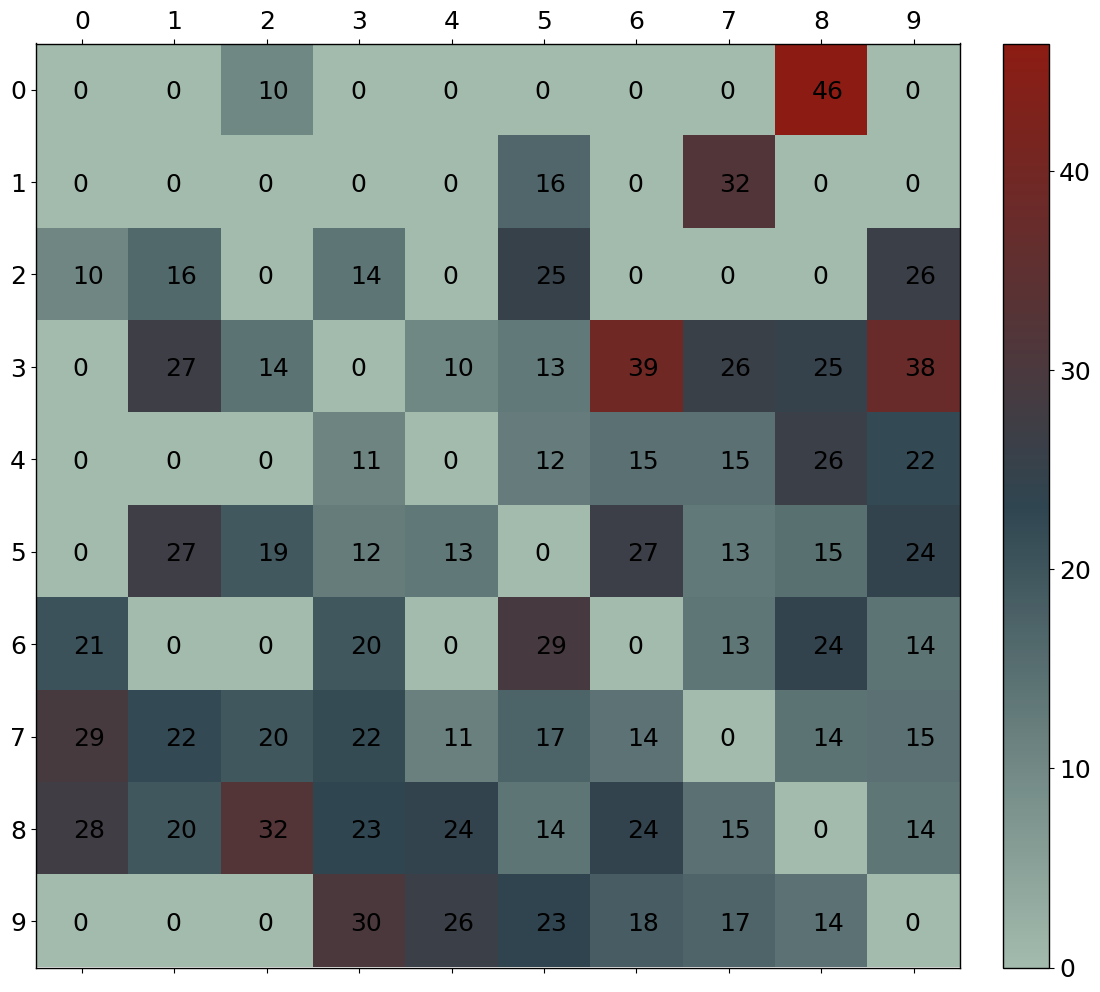

In [74]:
alpha = [i for i in range(0,10)]
fig, ax = plt.subplots(figsize=(14,12))
cax = ax.matshow(price_matrix, cmap=cmap, interpolation='nearest')
for i in range(10):
    for j in range(10):
        plt.text(j-0.1,i+0.1, f"{price_matrix[i,j]:.0f}")
fig.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_xticks(alpha)
ax.set_yticks(alpha)
plt.show()

In [28]:
df_prices.query(f"origin=={3} & destination=={4}").price.to_dict().values()

dict_values([10.0])